<a href="https://colab.research.google.com/github/cicada0521/Finance/blob/main/Benford's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

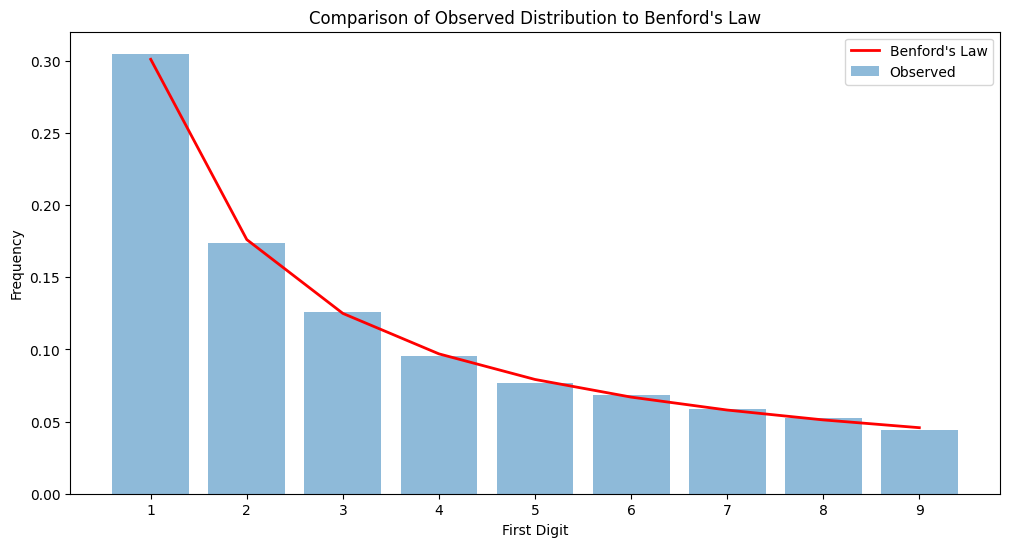

Chi-Square statistic: 0.0003
p-value: 1.0000
The data follows Benford's Law distribution.
There is no strong evidence of anomalies or manipulation in the data.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Generate synthetic financial data
np.random.seed(42)
n_transactions = 10000
amounts = np.random.lognormal(mean=5, sigma=1.5, size=n_transactions)
df = pd.DataFrame({'Amount': amounts})

def get_first_digit(number):
    return int(str(abs(number)).strip('0.')[0])

def benford_law_distribution():
    return [np.log10(1 + 1/d) for d in range(1, 10)]

def plot_benford_comparison(observed_freq, expected_freq):
    digits = range(1, 10)

    plt.figure(figsize=(12, 6))
    plt.bar(digits, observed_freq, alpha=0.5, label='Observed')
    plt.plot(digits, expected_freq, 'r-', linewidth=2, label="Benford's Law")
    plt.xlabel('First Digit')
    plt.ylabel('Frequency')
    plt.title("Comparison of Observed Distribution to Benford's Law")
    plt.legend()
    plt.xticks(digits)
    plt.show()

def chi_square_test(observed_freq, expected_freq):
    chi2, p_value = stats.chisquare(observed_freq, expected_freq)
    return chi2, p_value

# Extract first digits
df['FirstDigit'] = df['Amount'].apply(get_first_digit)

# Calculate observed frequencies
observed_counts = df['FirstDigit'].value_counts().sort_index()
total_count = observed_counts.sum()
observed_freq = observed_counts / total_count

# Calculate expected frequencies (Benford's Law)
expected_freq = benford_law_distribution()

# Plot comparison
plot_benford_comparison(observed_freq, expected_freq)

# Perform Chi-Square test
chi2, p_value = chi_square_test(observed_freq, expected_freq)

print(f"Chi-Square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("The data significantly deviates from Benford's Law distribution.")
    print("This may indicate potential anomalies or manipulation in the data.")
else:
    print("The data follows Benford's Law distribution.")
    print("There is no strong evidence of anomalies or manipulation in the data.")